## Basic Import 

In [2]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import community as community_louvain
from networkx.algorithms.community import girvan_newman as gn
from networkx.algorithms.community import k_clique_communities  as kcc
from networkx.algorithms.community import greedy_modularity_communities as gmc
from networkx.algorithms import cuts
from networkx.algorithms.clique import find_cliques
import pandas as pd


## Load the network

In [16]:
filePath = 'CA-HEpPh.txt'
G = nx.read_edgelist(filePath, comments='#', create_using=nx.Graph(), nodetype=int, encoding='utf-8')
print('there are {0} links and {1} nodes'.format(G.number_of_edges(), G.number_of_nodes()))

there are 118521 links and 12008 nodes


## Part1 & Part2

### Connectedness

In [ ]:
# print('Amazon is strongly connected: {0}'.format(nx.is_strongly_connected(G)))
# print('Amazon is weakly connected: {0}'.format(nx.is_weakly_connected(G)))
print('G is connected: {0}'.format(nx.is_connected(G)))

plt.figure(figsize=(10, 10))
nx.draw(G, node_size=5, node_color='blue', alpha=0.8, edge_color='black', with_labels=False)

### Component

In [ ]:
# print('G has {0} strongly connected components'.format(nx.number_strongly_connected_components(G)))
# print('G has {0} weakly connected components'.format(nx.number_weakly_connected_components(G)))
# print('G has max strongly connected component with {0} nodes'.format(len(max(nx.strongly_connected_components(G), key=len))))
# print('G has max weakly connected component with {0} nodes'.format(len(max(nx.weakly_connected_components(G), key=len))))

print('G has {0} connected components'.format(nx.number_connected_components(G)))
print('G has max connected component with {0} nodes'.format(len(max(nx.connected_components(G), key=len))))  


### Largest Component

In [ ]:
largest_component = max(nx.connected_components(G), key=len)
LC = G.subgraph(largest_component)

# average distance
print('average distance: {0}'.format(nx.average_shortest_path_length(LC)))

# diameter
print('diameter: {0}'.format(nx.diameter(LC)))

### Degree Distribution

Amazon has max degree 491 and min degree 1
Amazon has average degree 19.740339773484344


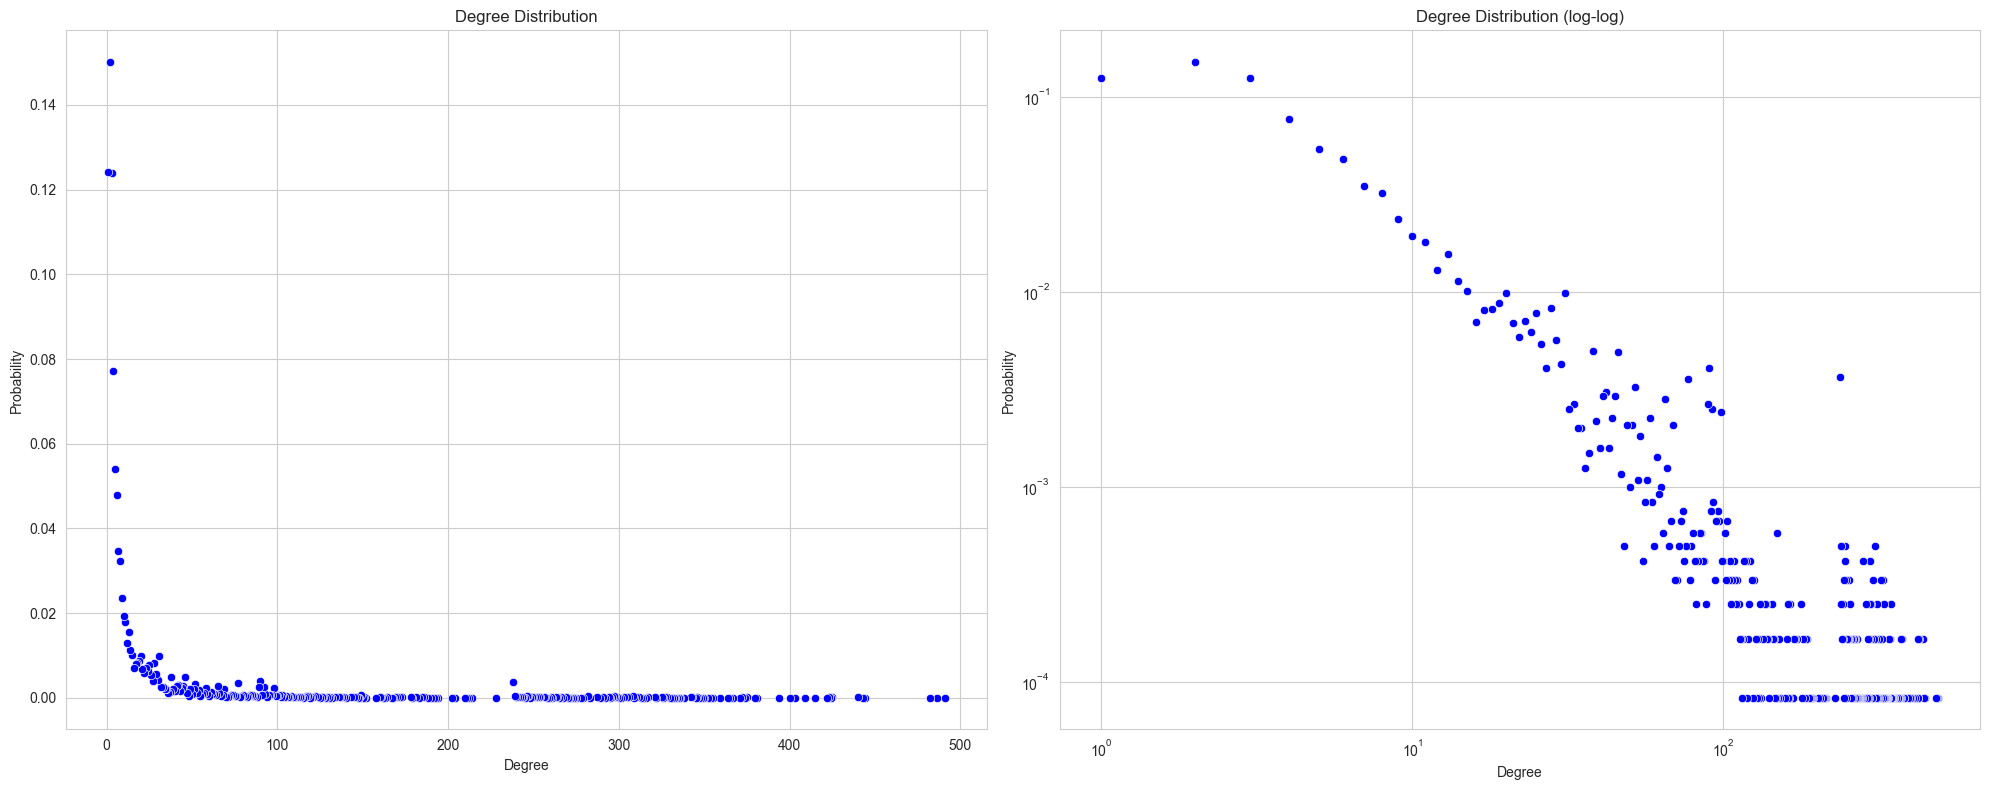

In [21]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
print('Amazon has max degree {0} and min degree {1}'.format(max(deg), min(deg)))
print('Amazon has average degree {0}'.format((sum(degree_sequence) / len(degree_sequence))))

sum_count = sum(cnt)
freq = [c/sum_count for c in cnt]

sns.set_style('whitegrid')
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x = deg, y =freq, color='b', marker='o')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution')

plt.subplot(1, 2, 2)
sns.scatterplot(x = deg, y =freq, color='b', marker='o')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.xscale('log')
plt.yscale('log')
plt.title('Degree Distribution (log-log)')

plt.tight_layout()
plt.show()


## Hubs

In [ ]:
one_percent = int(0.01 * len(G.nodes()))
print('one percent of nodes: {0}'.format(one_percent))
degree_sequence[:one_percent]

As a cutoff at the forth degree, we choose hubs as 482, 486, 491

In [ ]:
degrees = nx.degree(G)
avg_neighbor_degrees = nx.average_neighbor_degree(G)

degrees = [deg for node, deg in degrees]
avg_neighbor_degrees = [avg_neighbor_degrees[node] for node in G.nodes()]

In [ ]:
sns.set_style('whitegrid')  

plt.figure(figsize=(8, 6))
plt.plot(degrees, avg_neighbor_degrees, marker= 'o', color='b',markersize = 2.5, linestyle = 'None') 
plt.xlabel('Degree')
plt.ylabel('Average Neighbor Degree')
plt.title('Degree-Degree Correlation Plot')
plt.show()

In [ ]:
assortativity_coefficient = nx.degree_assortativity_coefficient(G)
print(f"Assortativity Coefficient: {assortativity_coefficient}")

The average assrotativity coefficient is 0.632 indicating assortativity (high-degree nodes tend to connect with high-degree nodes).

### Clustring

In [ ]:
clustering_coeffs = nx.clustering(G).values()
print('G has average clustering coefficient {0}'.format(sum(clustering_coeffs) / len(clustering_coeffs)))
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))
plt.hist(clustering_coeffs, bins=30, color='b')
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

The average clustering coefficient of 0.611 is quite high. The clustering coefficient measures the degree to which nodes in a graph tend to cluster together. A high clustering coefficient indicates that nodes are more likely to form tightly-knit groups, where nodes are highly interconnected.

The clustering coefficient is consistency with the complete graph between co-authers

In [ ]:
degrees = []
clusters = []
for node in G.nodes():
    degrees.append(G.degree(node))
    clusters.append(nx.clustering(G, node))

In [ ]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(10,8))

plt.plot(degrees, clusters, marker='o', linestyle='None', color='b', markersize=2.5)    
plt.xlabel(r"degree $k_i$", fontsize=16)
plt.ylabel(r"$C_i$", fontsize=16)
plt.xscale("log")
plt.title("Clustering Coefficient vs Degree")
plt.show()

Nodes with low degrees (on the left side of the plot) exhibit a wide range of clustering coefficients, from 0 to 1.

Nodes with high degrees (on the right side of the plot) tend to have lower clustering coefficients, often clustering around lower values.

- Hierarchical Structure:

The decreasing trend in clustering coefficient with increasing degree suggests a hierarchical structure in the network. High-degree nodes serve as hubs connecting different clusters, while low-degree nodes are more likely to be part of these clusters.

- Small-World Nature:

The high clustering coefficient for low-degree nodes combined with the low clustering coefficient for high-degree nodes is a common feature of small-world networks. This means that the network exhibits high local clustering while maintaining short average path lengths between nodes.

- Assortativity:

The plot suggests disassortativity in the network, where high-degree nodes connect with low-degree nodes. This is indicated by the low clustering coefficients of high-degree nodes, which are likely connecting different clusters of low-degree nodes.

# Cliques Detection

In [ ]:
cliques = list(find_cliques(G))
print("All Cliques:", cliques)

clique_sizes = [len(clique) for clique in cliques]
print("Clique Sizes", clique_sizes)

print("Number of Cliques: ", len(cliques))

print('Number of Cliques size > 3: ', len([clique for clique in cliques if len(clique) > 3]))

avg_clique_size = sum(clique_sizes) / len(cliques)
print("Average Clique Size: ", avg_clique_size)

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))

plt.hist(clique_sizes, bins=100, color='b')
plt.title("Clique Size Distribution")
plt.xlabel("Clique Size")
plt.ylabel("Frequency")
# plt.xlim(0, 50)
# plt.xscale('log')
plt.yscale('log')

plt.show()

In [ ]:
df = pd.read_csv('CA-HepPh.txt', sep='\t', comment='#', header=None, names=['FromNode', 'ToNode'])

edge_counts = df.groupby(['FromNode', 'ToNode']).size().reset_index(name='Count')

edge_counts_sorted = edge_counts.sort_values(by='Count', ascending=False)

print(edge_counts_sorted)
# No duplicate edges, so weights are 1
df.to_csv('CA-HepPh.csv', index=False)

# Community Detection

In [18]:
filePath = 'CA-GrQc.txt'
G = nx.read_edgelist(filePath, comments='#', create_using=nx.Graph(), nodetype=int, encoding='utf-8')
print('there are {0} links and {1} nodes'.format(G.number_of_edges(), G.number_of_nodes()))

there are 14496 links and 5242 nodes


## Louvain Algo

In [19]:
import networkx as nx
import community as community_louvain
from networkx.algorithms.community.quality import modularity

# 使用Louvain算法
partition = community_louvain.best_partition(G)
communities_GL = [[] for i in range(max(partition.values()) + 1)]
for node, com in partition.items():
    communities_GL[com].append(node)

# 计算模块度
modularity_value = modularity(G , communities_GL)
print(f"Louvain Algorithm Modularity: {modularity_value}")

Louvain Algorithm Modularity: 0.8630191053884303


In [38]:
communities_GL

[[3466,
  937,
  8579,
  15931,
  18720,
  19607,
  20827,
  21806,
  8978,
  9017,
  15170,
  15455,
  16589,
  2255,
  3056,
  6158,
  7307,
  7324,
  8365,
  9023,
  11444,
  12324,
  12472,
  13831,
  14746,
  16128,
  17075,
  18875,
  19900,
  20000,
  20806,
  21944,
  21968,
  23302,
  23665,
  23758,
  24722,
  12045,
  12287,
  14181,
  20257,
  21613,
  16994,
  3197,
  6160,
  8589,
  14924,
  15972,
  18940,
  19090,
  19475,
  22790,
  24001,
  25228,
  1817,
  3725,
  5366,
  15911,
  24009,
  283,
  1880,
  5505,
  15959,
  15961,
  24444,
  23256,
  8376,
  8888,
  13067,
  4213,
  11892,
  20645,
  23264,
  10600,
  13493,
  13496,
  18788,
  18791,
  23394,
  4896,
  16770,
  24578,
  1090,
  3990,
  4635,
  4759,
  15166,
  24860,
  26005,
  4135,
  15198,
  18067,
  18297,
  2789,
  6641,
  15920,
  18233,
  24582,
  24583,
  81,
  7281,
  25597,
  23727,
  1499,
  20261,
  24002,
  23653,
  9095,
  12043,
  18742,
  22890,
  26044,
  8876,
  10990,
  124,
  14319,

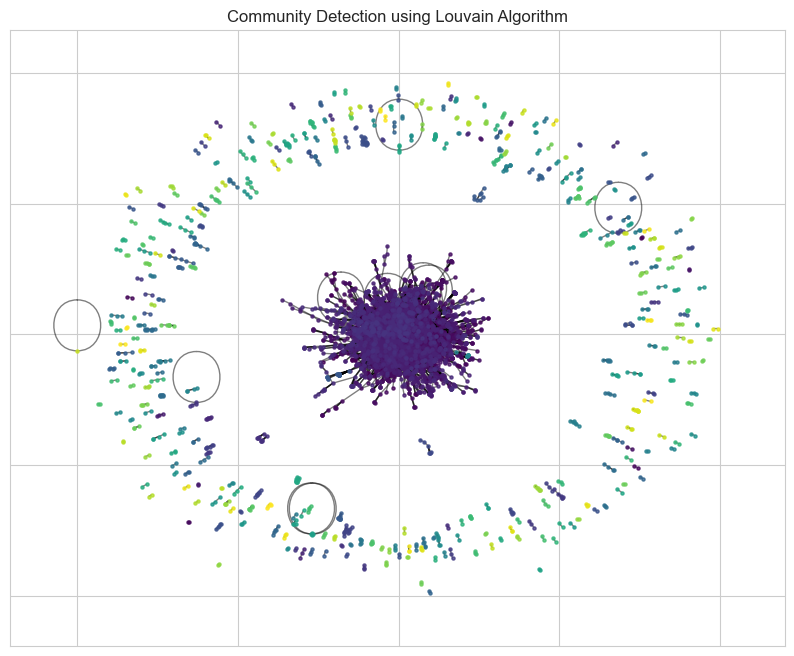

In [18]:
pos = nx.spring_layout(G)

color_map = plt.get_cmap('viridis')
colors = color_map(np.linspace(0, 1, len(communities_GL)))

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
for community, color in zip(communities_GL, colors):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[color] , node_size=5, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='black', alpha=0.5,node_size=5)
# nx.draw_networkx_labels(G, pos)

plt.title("Community Detection using Louvain Algorithm")
plt.show()

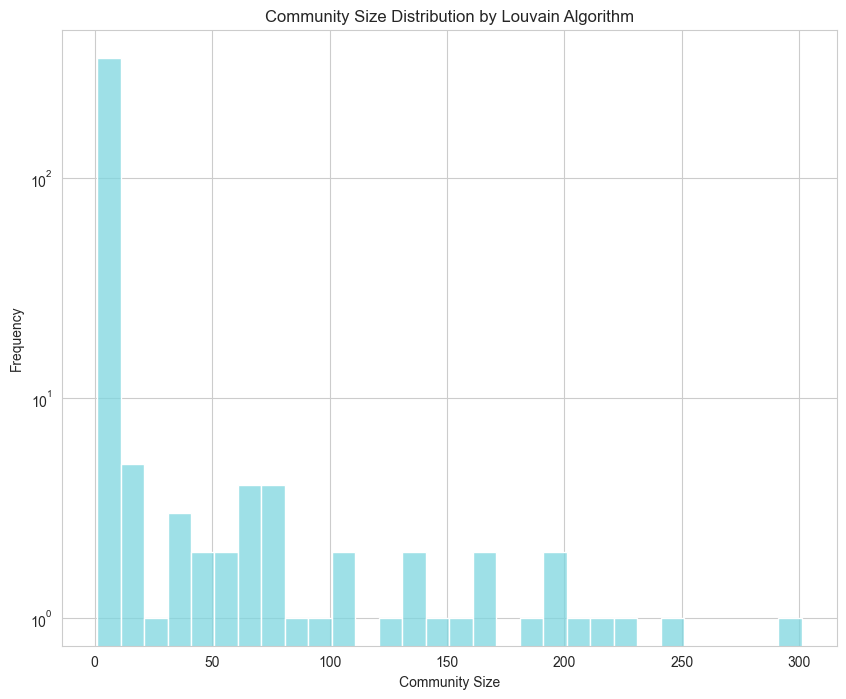

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.histplot([len(x) for x in communities_GL], color='#7ed6df', bins=30)
plt.xlabel('Community Size')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Community Size Distribution by Louvain Algorithm')

plt.show()

## Girvan-Newman

In [21]:
import networkx as nx
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community.quality import modularity

# 使用Girvan-Newman算法
comp = girvan_newman(G)
communities = next(comp)

# 将节点集合转换为列表
communities_GN = [list(c) for c in communities]

# 计算模块度
modularity_value = modularity(G, communities_GN)
print(f"Girvan-Newman Algorithm Modularity: {modularity_value}")

Girvan-Newman Algorithm Modularity: 0.17641819590027658


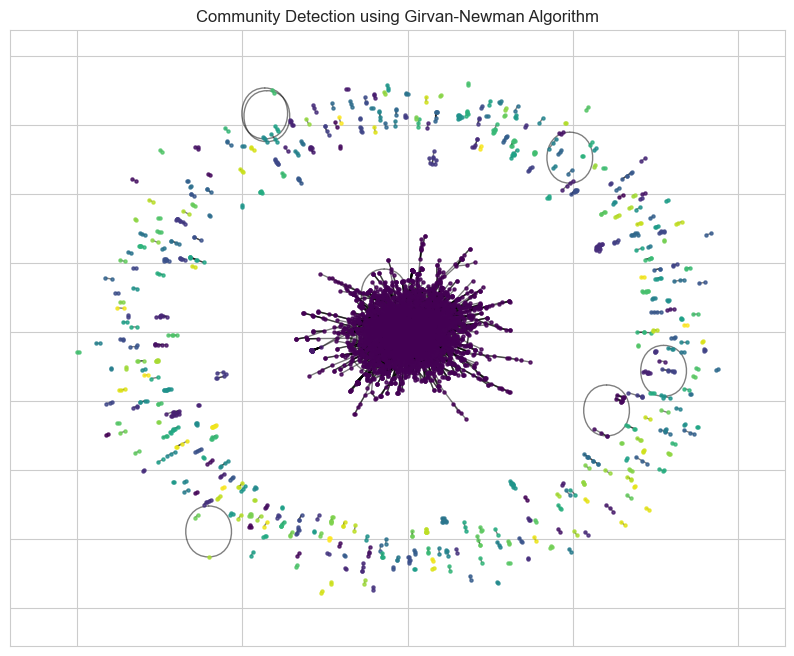

In [23]:
pos = nx.spring_layout(G)

color_map = plt.get_cmap('viridis')
colors = color_map(np.linspace(0, 1, len(communities_GN)))

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
for community, color in zip(communities_GN, colors):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[color] , node_size=5, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='black', alpha=0.5,node_size=5)
# nx.draw_networkx_labels(G, pos)

plt.title("Community Detection using Girvan-Newman Algorithm")
plt.show()

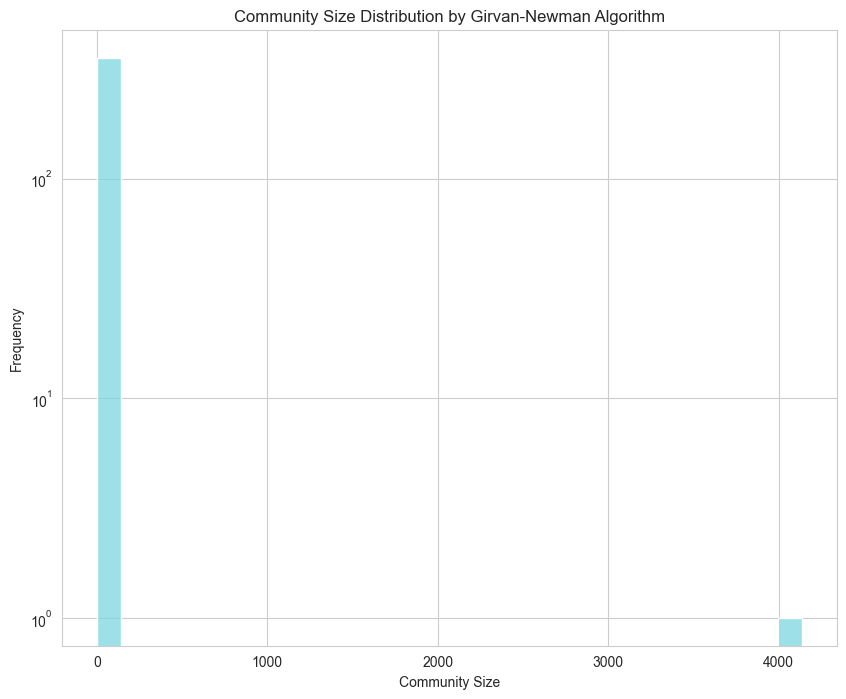

In [36]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.histplot([len(x) for x in communities_GN], color='#7ed6df', bins=30)
plt.xlabel('Community Size')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Community Size Distribution by Girvan-Newman Algorithm')

plt.show()

## Infomap

In [12]:
#should be run in linux
import networkx as nx
import infomap

# 创建一个示例图
G = nx.karate_club_graph()

# 使用Infomap算法
im = infomap.Infomap()
for e in G.edges():
    im.addLink(*e)
im.run()

# 获取社区
communities_IM = [[] for _ in range(im.numTopModules())]
for node in im.nodes:
    communities[node.moduleIndex()].append(node.nodeId())

# 计算模块度
modularity_value = modularity(G, communities_IM )
print(f"Infomap Algorithm Modularity: {modularity_value}")

ModuleNotFoundError: No module named 'infomap'

In [ ]:
pos = nx.spring_layout(G)

color_map = plt.get_cmap('viridis')
colors = color_map(np.linspace(0, 1, len(communities_IM )))

sns.set_style('whitegrid')

for community, color in zip(communities_IM , colors):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[color] , node_size=5, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='black', alpha=0.5,node_size=5)
# nx.draw_networkx_labels(G, pos)

plt.title("Community Detection using Spectral Clustering")
plt.show()

## Kernighan-Lin

In [25]:
import networkx as nx
from networkx.algorithms.community import kernighan_lin_bisection

# 使用Kernighan-Lin算法
communities = kernighan_lin_bisection(G)

# 将节点集合转换为列表
communities_KL = [list(c) for c in communities]

# 计算模块度
modularity_value = modularity(G, communities_KL)
print(f"Kernighan-Lin Algorithm Modularity: {modularity_value}")


Kernighan-Lin Algorithm Modularity: 0.4349468840875339


In [32]:
len(communities_KL)

2

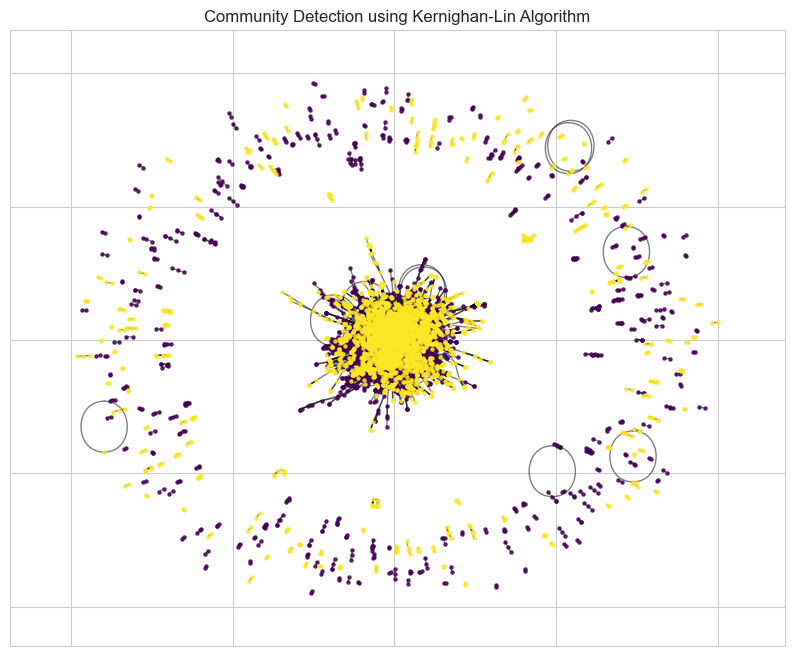

In [33]:
pos = nx.spring_layout(G)

color_map = plt.get_cmap('viridis')
colors = color_map(np.linspace(0, 1, len(communities_KL)))

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
for community, color in zip(communities_KL, colors):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[color] , node_size=5, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='black', alpha=0.5,node_size=5)
# nx.draw_networkx_labels(G, pos)

plt.title("Community Detection using Kernighan-Lin Algorithm")
plt.show()

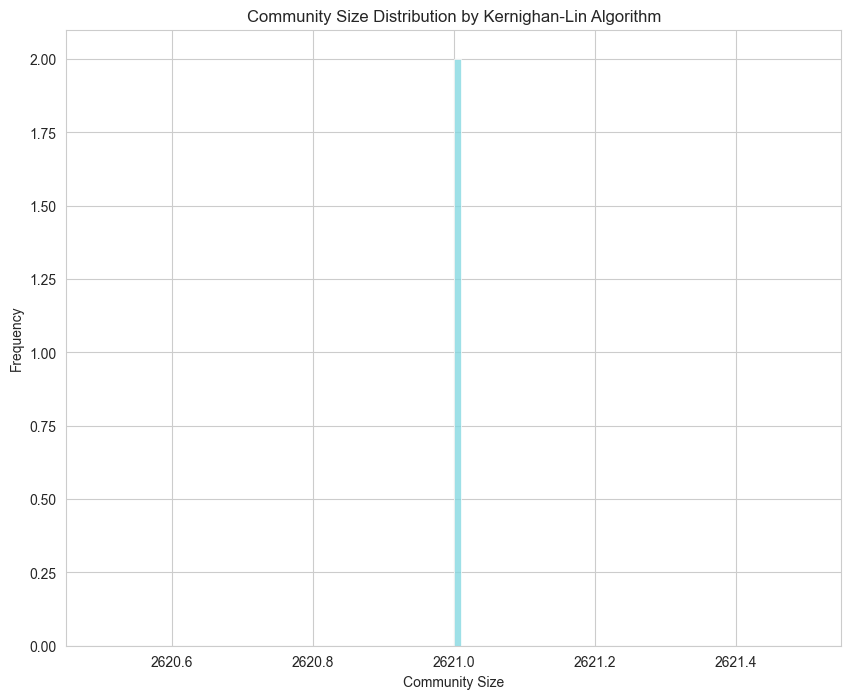

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.histplot([len(x) for x in communities_KL], color='#7ed6df', bins=100)
plt.xlabel('Community Size')
plt.ylabel('Frequency')
# plt.yscale('log')
# plt.xscale('log')
plt.title('Community Size Distribution by Kernighan-Lin Algorithm')

plt.show()

C:\Users\LuoLizhuo\AppData\Local\Temp\ipykernel_23740\4063660927.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Algorithm', y='Modularity', data=df, palette='flare', ax=ax, width=0.5)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


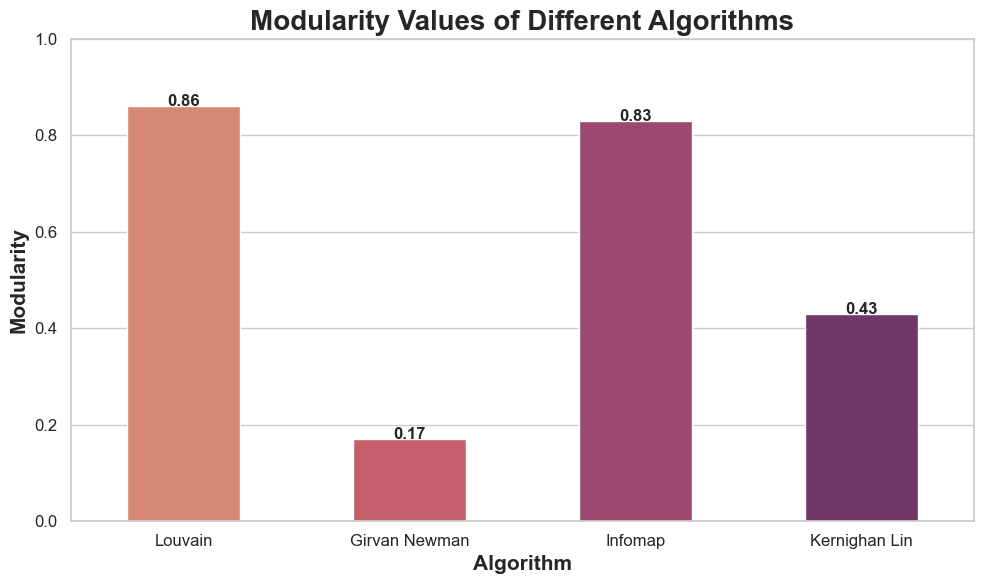

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

x = ['Louvain', 'Girvan Newman', 'Infomap', 'Kernighan Lin']
modularity_values = [0.86, 0.17, 0.83, 0.43]

df = pd.DataFrame({'Algorithm': x, 'Modularity': modularity_values})

sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

barplot = sns.barplot(x='Algorithm', y='Modularity', data=df, palette='flare', ax=ax, width=0.5)
ax.set_title('Modularity Values of Different Algorithms', fontsize=20, fontweight='bold')
ax.set_xlabel('Algorithm', fontsize=15, fontweight='bold')
ax.set_ylabel('Modularity', fontsize=15, fontweight='bold')

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Optional: Add the exact values on top of the bars
for p in barplot.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height, 
            s = '{:.2f}'.format(height), 
            ha = 'center', fontsize=12, fontweight='bold')

# sns.despine() # Uncomment if you want to remove the top and right spines

# Adjusting legend settings (optional)
legend = ax.legend().set_visible(False)  # Hiding the legend as it's not necessary in this context

plt.tight_layout()
plt.ylim(0, 1)  # Setting the y-axis limit to fit the modularity values
plt.show()


## Hierarchical Structure

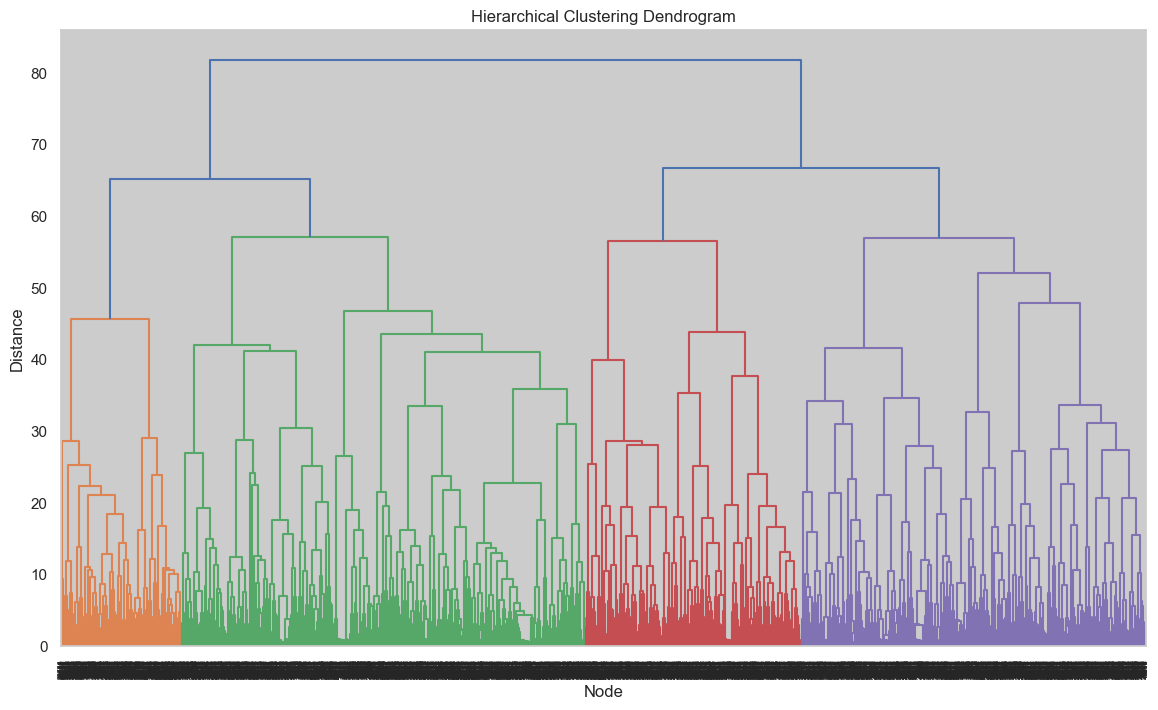

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import numpy as np


path_length = dict(nx.all_pairs_shortest_path_length(G))

nodes = list(G.nodes())

distances = {}

for i, node_i in enumerate(nodes):
    for j, node_j in enumerate(nodes):
        if i != j:
            if node_i in path_length and node_j in path_length[node_i]:
                distances[(node_i, node_j)] = path_length[node_i][node_j]

filtered_nodes = set()
for (node_i, node_j), distance in distances.items():
    filtered_nodes.add(node_i)
    filtered_nodes.add(node_j)

filtered_nodes = list(filtered_nodes)
n_filtered = len(filtered_nodes)

filtered_distances = np.zeros((n_filtered, n_filtered))

for i, node_i in enumerate(filtered_nodes):
    for j, node_j in enumerate(filtered_nodes):
        if i != j:
            if (node_i, node_j) in distances:
                filtered_distances[i, j] = distances[(node_i, node_j)]
            elif (node_j, node_i) in distances:  
                filtered_distances[i, j] = distances[(node_j, node_i)]

linkage_matrix = linkage(squareform(filtered_distances), method='ward')

plt.figure(figsize=(14, 8))
dendrogram(linkage_matrix, labels=filtered_nodes)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Node')
plt.ylabel('Distance')
plt.show()




# Null Model

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


original_degrees = [d for n, d in G.degree()]

def degree_preserving_randomization(G, num_swaps):
    
    random_graph = G.copy()
    edges = list(random_graph.edges())
    num_edges = len(edges)
    
    for _ in range(num_swaps):
        
        edge1 = edges[np.random.randint(0, num_edges)]
        edge2 = edges[np.random.randint(0, num_edges)]
       
        (u1, v1) = edge1
        (u2, v2) = edge2
     
        if len(set([u1, v1, u2, v2])) == 4: 
            random_graph.remove_edge(u1, v1)
            random_graph.remove_edge(u2, v2)
            random_graph.add_edge(u1, u2)
            random_graph.add_edge(v1, v2)
            edges = list(random_graph.edges())
    
    return random_graph


num_swaps = 10 * len(G.edges())

random_G = degree_preserving_randomization(G, num_swaps)

random_degrees = [d for n, d in random_G.degree()]

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(original_degrees, bins=range(max(original_degrees)+1), alpha=0.75, label='Original')
plt.title('Original Graph Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(122)
plt.hist(random_degrees, bins=range(max(random_degrees)+1), alpha=0.75, label='Randomized')
plt.title('Randomized Graph Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


IndexError: list index out of range

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

degree_sequence = [degree for node, degree in G.degree()]

# Step 3: Generate the null model network
null2 = nx.configuration_model(degree_sequence)
null2 = nx.Graph(null2)  # Remove parallel edges and self-loops
null2.remove_edges_from(nx.selfloop_edges(null2))

All Cliques: [[16389, 21379, 21281, 20116], [16389, 21379, 17289], [16389, 21379, 23051], [16389, 21379, 16414, 8768, 23038], [16389, 21379, 16414, 8768, 11015], [16389, 21379, 16414, 21491], [16389, 21379, 20478, 21491], [16389, 21379, 20478, 23038], [16389, 17828, 21281, 3502, 1839, 16881, 23864, 1265, 25910, 15126], [16389, 4068, 16210, 21491], [16389, 4068, 21491, 16414], [16389, 4068, 23038, 8768, 16414], [16389, 4068, 23038, 9993], [16389, 9993, 23051], [16389, 22476, 20478, 23038], [16389, 21165, 11015], [16389, 9937, 8768, 23038, 16414], [16389, 23382, 20478, 23038], [16393, 17330, 1339, 15580, 20478], [13, 11196], [13, 7596], [13, 19170], [14, 14171], [22, 15793, 19440], [22, 15793, 106, 11183], [22, 22618, 25043], [24, 23161, 3858, 19517], [24, 15774], [25, 22891], [26, 4550, 13096, 11801, 13142, 1407], [27, 19081, 11114, 25540, 24726], [28, 7916], [29, 20243], [16414, 8768, 22696], [16414, 8768, 21754, 9937, 24270, 23038], [16414, 8768, 20148], [16414, 15614, 16368], [16414,

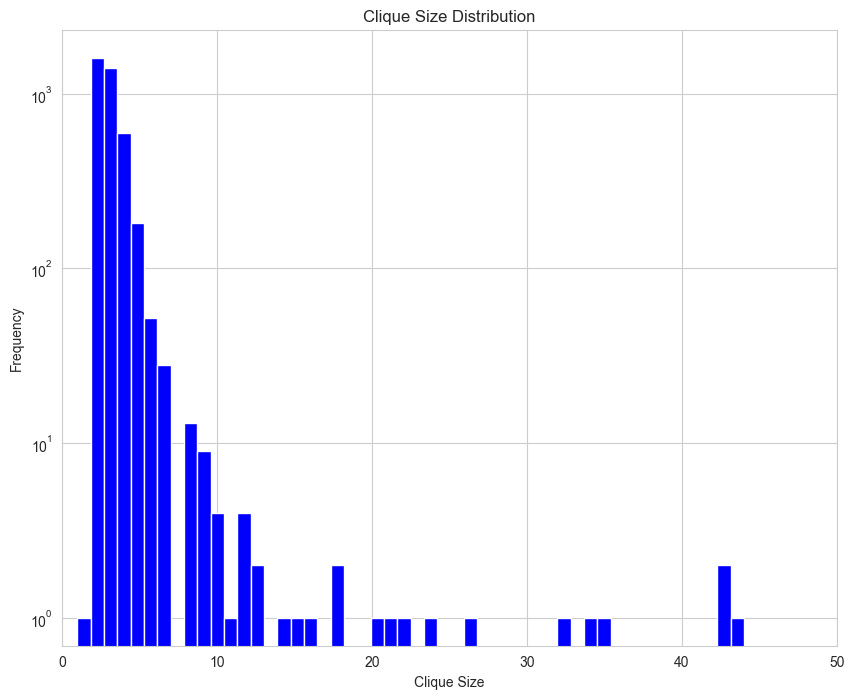

In [61]:
cliques = list(find_cliques(G))
print("All Cliques:", cliques)

clique_sizes = [len(clique) for clique in cliques]
print("Clique Sizes", clique_sizes)

print("Number of Cliques: ", len(cliques))

print('Number of Cliques size > 3: ', len([clique for clique in cliques if len(clique) > 3]))

avg_clique_size = sum(clique_sizes) / len(cliques)
print("Average Clique Size: ", avg_clique_size)

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))

plt.hist(clique_sizes, bins=50, color='b')
plt.title("Clique Size Distribution")
plt.xlabel("Clique Size")
plt.ylabel("Frequency")
plt.xlim(0, 50)
# plt.ylim(0, 10000)
# plt.xscale('log')
plt.yscale('log')

plt.show()

All Cliques: [[0, 4578], [0, 262], [0, 295], [0, 1482], [0, 76], [0, 114], [0, 279], [0, 1817], [1, 1764], [1, 1252], [1, 1040], [1, 2455], [1, 4829], [2, 295], [2, 431], [3, 555], [3, 2251], [3, 271], [3, 4627], [3, 1723], [4, 1636], [4, 3749], [4, 4902], [4, 615], [4, 1128], [4, 2886], [4, 1066], [4, 1037], [4, 525], [4, 1586], [4, 20], [4, 87], [4, 539], [5, 4519], [5, 4042], [5, 459], [5, 1294], [5, 336], [5, 658], [5, 1300], [5, 825], [5, 3740], [5, 2398], [6, 864], [6, 1281], [6, 4194], [6, 230], [6, 135], [6, 3119], [6, 2140, 857], [6, 369], [6, 1265], [6, 3124], [6, 244, 857], [6, 244, 1270], [6, 154], [6, 3547], [6, 3164], [6, 767], [7, 353], [7, 2970], [7, 1939], [8, 4035], [8, 1037], [8, 1933], [8, 278], [9, 4994], [9, 3045], [9, 3943], [9, 1609], [9, 2194], [9, 343], [9, 280], [9, 1278], [10, 296], [10, 196], [10, 2479], [11, 1798], [11, 1033], [11, 1292, 390], [11, 1292, 1909], [11, 1292, 302], [11, 1295, 302], [11, 1295, 1275], [11, 1295, 630], [11, 274, 302], [11, 3861],

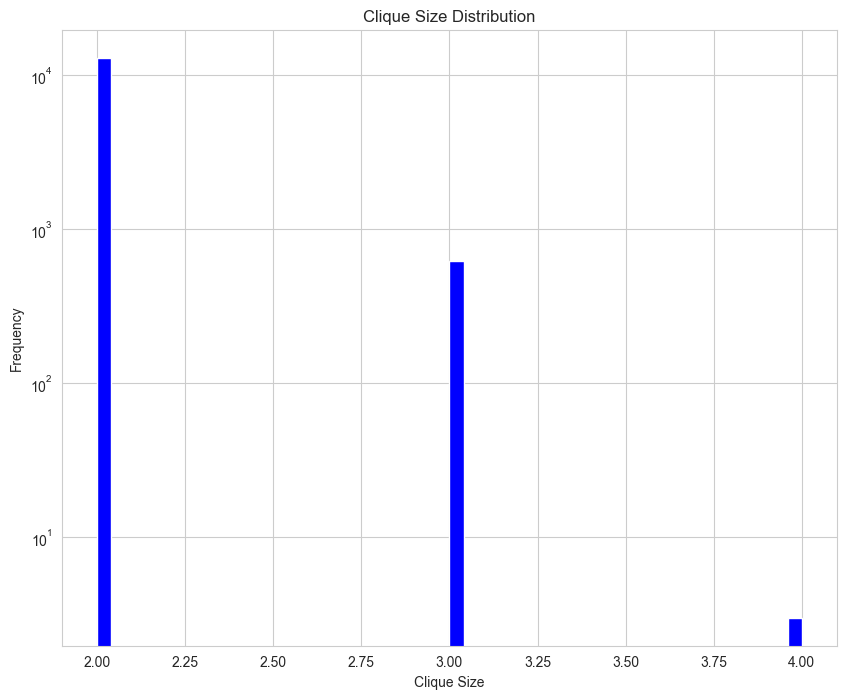

In [58]:
cliques = list(find_cliques(null2))
print("All Cliques:", cliques)

clique_sizes = [len(clique) for clique in cliques]
print("Clique Sizes", clique_sizes)

print("Number of Cliques: ", len(cliques))

print('Number of Cliques size > 3: ', len([clique for clique in cliques if len(clique) > 3]))

avg_clique_size = sum(clique_sizes) / len(cliques)
print("Average Clique Size: ", avg_clique_size)

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))

plt.hist(clique_sizes, bins=50, color='b')
plt.title("Clique Size Distribution")
plt.xlabel("Clique Size")
plt.ylabel("Frequency")
# plt.xlim(0, 10)
# plt.xscale('log')
plt.yscale('log')

plt.show()

G has average clustering coefficient 0.529635811052136


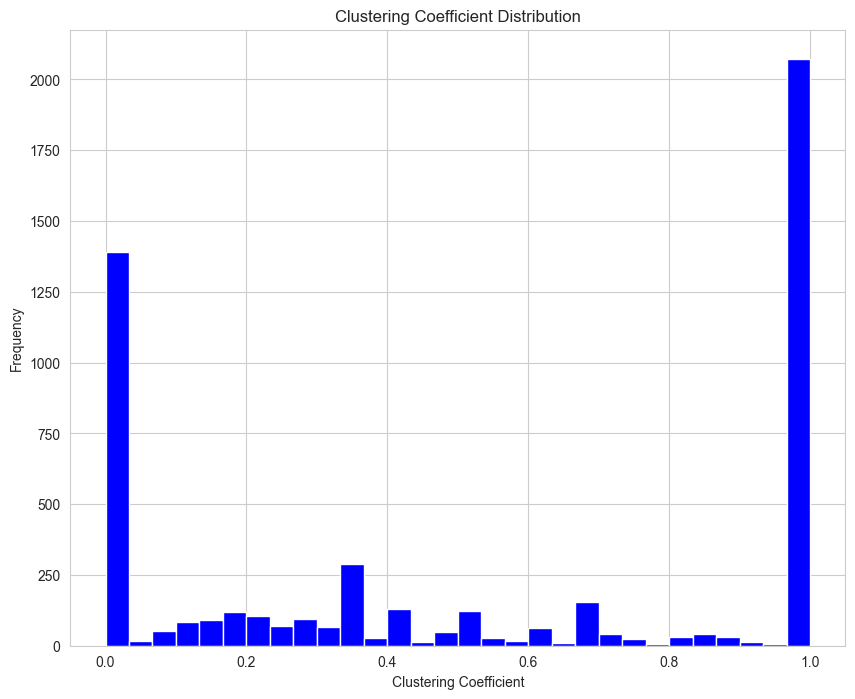

In [62]:
clustering_coeffs = nx.clustering(G).values()
print('G has average clustering coefficient {0}'.format(sum(clustering_coeffs) / len(clustering_coeffs)))
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))
plt.hist(clustering_coeffs, bins=30, color='b')
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

G has average clustering coefficient 0.006304207025351096


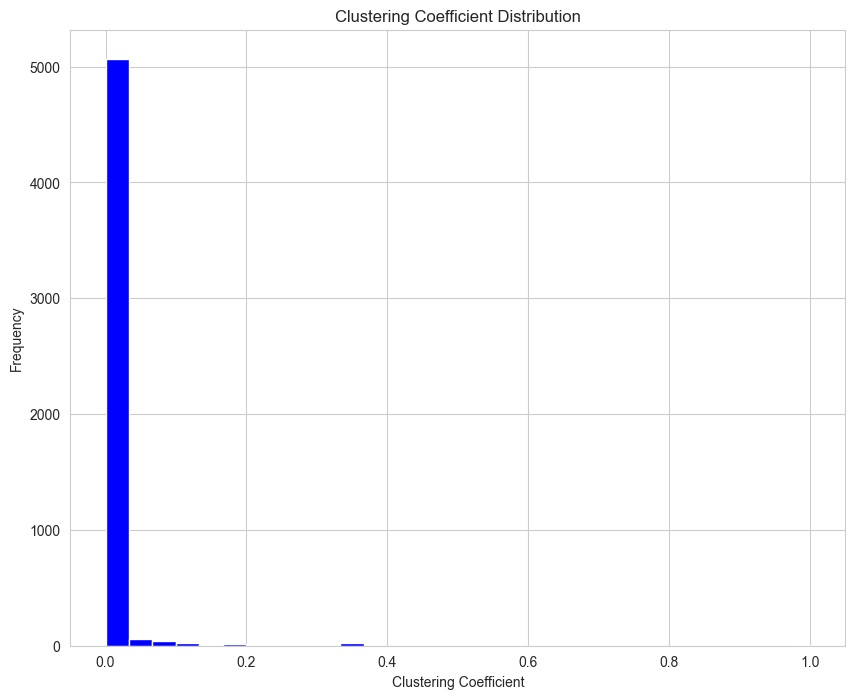

In [63]:
clustering_coeffs = nx.clustering(null2).values()
print('G has average clustering coefficient {0}'.format(sum(clustering_coeffs) / len(clustering_coeffs)))
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))
plt.hist(clustering_coeffs, bins=30, color='b')
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Plot G
plt.figure(figsize=(14, 7))
plt.subplot(121)
nx.draw(G, node_color='blue', with_labels=True, node_size=5, font_size=10)
plt.title('Observed data network')

# Plot null model network
plt.subplot(122)
nx.draw(null2, node_color='red', with_labels=True, node_size=5, font_size=10)
plt.title('Null Model Network with preserved Degree Sequence')

# Show the plots
plt.show()

# Simulation and Prediction

In [27]:
count = 0
for i in communities_GL:
    count +=1
    print('Community {1} has {0} nodes'.format(len(i), count))

# communities_GN[107]

Community 1 has 2 nodes
Community 2 has 2 nodes
Community 3 has 37 nodes
Community 4 has 296 nodes
Community 5 has 101 nodes
Community 6 has 137 nodes
Community 7 has 116 nodes
Community 8 has 19 nodes
Community 9 has 168 nodes
Community 10 has 2 nodes
Community 11 has 61 nodes
Community 12 has 2 nodes
Community 13 has 129 nodes
Community 14 has 239 nodes
Community 15 has 42 nodes
Community 16 has 2 nodes
Community 17 has 50 nodes
Community 18 has 177 nodes
Community 19 has 6 nodes
Community 20 has 20 nodes
Community 21 has 47 nodes
Community 22 has 2 nodes
Community 23 has 169 nodes
Community 24 has 2 nodes
Community 25 has 119 nodes
Community 26 has 62 nodes
Community 27 has 124 nodes
Community 28 has 160 nodes
Community 29 has 2 nodes
Community 30 has 2 nodes
Community 31 has 2 nodes
Community 32 has 62 nodes
Community 33 has 272 nodes
Community 34 has 2 nodes
Community 35 has 132 nodes
Community 36 has 216 nodes
Community 37 has 36 nodes
Community 38 has 51 nodes
Community 39 has 2

In [41]:
filePath = 'CA-GrQc.txt'
G = nx.read_edgelist(filePath, comments='#', create_using=nx.Graph(), nodetype=int, encoding='utf-8')
print('there are {0} links and {1} nodes'.format(G.number_of_edges(), G.number_of_nodes()))
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

there are 14496 links and 5242 nodes


In [28]:
avg_degree = (sum(degree_sequence) / len(degree_sequence))
author_activity = {node: degree/avg_degree for node, degree in G.degree()}
for u, v in G.edges():
    G[u][v]['weight'] = 1
    
edge_weights = { edge :1 for edge in G.edges()}

sampel = G.subgraph(communities_GL[7]).copy()
avg_sample_degree = (sum([degree for node, degree in sampel.degree()]) / len(sampel.degree()))
author_activity = {node: degree/avg_sample_degree for node, degree in G.degree() if node in sampel.nodes()}
for u, v in sampel.edges():
    sampel[u][v]['weight'] = 1
edge_weights = { edge :1 for edge in sampel.edges()}

print(author_activity)
print(len(sampel.nodes()))

{24814: 2.732876712328767, 12118: 1.952054794520548, 19980: 1.0410958904109588, 5957: 1.821917808219178, 7716: 1.0410958904109588, 11233: 1.0410958904109588, 14090: 1.0410958904109588, 18397: 1.0410958904109588, 25541: 1.0410958904109588, 2249: 1.0410958904109588, 6077: 1.0410958904109588, 6611: 1.0410958904109588, 8672: 1.0410958904109588, 19955: 1.0410958904109588, 21832: 1.0410958904109588, 3316: 0.2602739726027397, 9759: 0.13013698630136986, 11865: 0.13013698630136986, 71: 0.13013698630136986}
19


MovieWriter imagemagick unavailable; using Pillow instead.


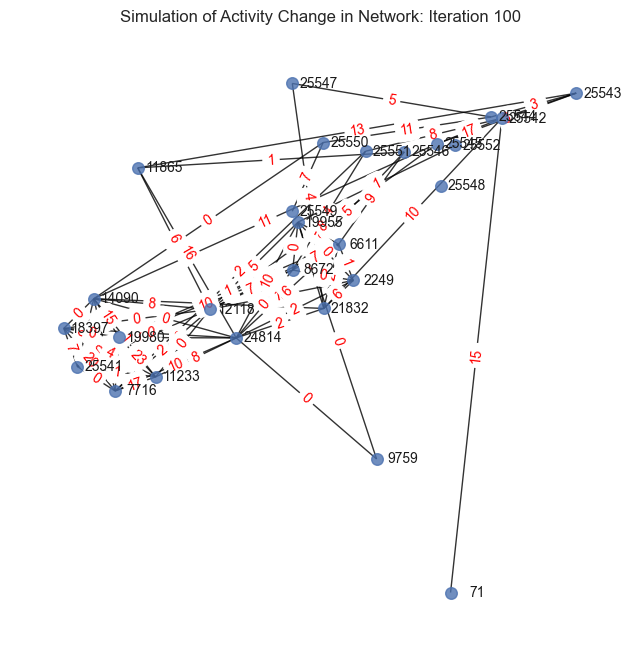

In [29]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.animation import FuncAnimation

def simulate_activity(G, author_activity, edge_weights, num_iterations=100):
    pos = nx.spring_layout(G, k=1.5, iterations=100)
    pos_array = np.array([pos[node] for node in G.nodes()])
    pos_array = nx.rescale_layout(pos_array, scale=2.0)
    pos = {node: pos_array[i] for i, node in enumerate(G.nodes())}
    
    history_author_activity = []
    history_edge_weights = []
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    def update(frame):
        ax.clear()
        history_author_activity.append(author_activity.copy())
        history_edge_weights.append(edge_weights.copy())
        
        authors = list(author_activity.keys())
        author_weights = [max(0.1, author_activity[author]) for author in authors]  # more active authors are more likely to be selected
        selected_authors = random.choices(authors, weights=author_weights, k=5)
        
        for author in selected_authors:
            activity_change = min(max(-1, int(np.random.normal(loc=0, scale=10) * author_activity[author])), 3)
            author_activity[author] += activity_change
            author_activity[author] = max(0, author_activity[author])
        
        edges = list(edge_weights.keys())
        edge_weights_list = [max(0.1, np.log(edge_weights[edge]+1)) for edge in edges]  # more weighted edges are more likely to be selected
        selected_edges = random.choices(edges, weights=edge_weights_list, k=10)
        
        for edge in selected_edges:
            weight_change = min(max(-1, int(np.random.normal(loc=0, scale=10) * (edge_weights[edge] + 1))), 2)
            edge_weights[edge] += weight_change
            edge_weights[edge] = max(0, edge_weights[edge])
            
        for (u, v), w in edge_weights.items():
            if G.has_edge(u, v):
                G[u][v]['weight'] = w
            else:
                G.add_edge(u, v, weight=w)
        
        # Add new nodes
        new_node_prob = 0.1  # Probability of adding a new node
        if random.random() < new_node_prob:
            new_node = max(G.nodes()) + 1
            G.add_node(new_node)
            author_activity[new_node] = random.randint(1, 10)
            pos[new_node] = np.random.rand(2) * 2  # Assign a random position to the new node
            num_new_edges = random.randint(1, 3)  
            existing_nodes = list(G.nodes())
            existing_nodes.remove(new_node)
            for _ in range(num_new_edges):
                target_node = random.choice(existing_nodes)
                G.add_edge(new_node, target_node, weight=random.randint(1, 5))
                edge_weights[(new_node, target_node)] = G[new_node][target_node]['weight']
        
        # Add new edges
        new_edge_prob = 0.2  # Probability of adding a new edge
        if random.random() < new_edge_prob:
            node1, node2 = random.sample(list(G.nodes()), 2)
            if not G.has_edge(node1, node2):
                G.add_edge(node1, node2, weight=random.randint(1, 5))
                edge_weights[(node1, node2)] = G[node1][node2]['weight']
        
        authors_to_remove = random.choices(list(author_activity.keys()), weights=[1/(x+0.1) for x in author_activity.values()], k=3)
        edges_to_remove = random.choices(list(edge_weights.keys()), weights=[1/(x+0.1) for x in edge_weights.values()], k=10)
        
        G_sub = G.copy()
        for author in authors_to_remove:
            if G_sub.has_node(author):
                G_sub.remove_node(author)
        for edge in edges_to_remove:
            if G_sub.has_edge(*edge):
                G_sub.remove_edge(*edge)
        
        # Update plot
        sns.set_style('whitegrid')
        edge_labels = nx.get_edge_attributes(G_sub, 'weight')
        nx.draw(G_sub, pos, node_size=70, node_color='b', edge_color='black', alpha=0.8, ax=ax)
        nx.draw_networkx_edge_labels(G_sub, pos, edge_labels=edge_labels, font_color='red', font_size=10, ax=ax)
        label_pos = {node: (x + 0.15, y) for node, (x, y) in pos.items()}
        nx.draw_networkx_labels(G_sub, label_pos, font_size=10, ax=ax)
        ax.set_title(f"Simulation of Activity Change in Network: Iteration {frame+1}")
        # plt.show()

    anim = FuncAnimation(fig, update, frames=num_iterations, repeat=False)
    anim.save('activity_simulation.gif', writer='imagemagick')
    plt.show()
    return history_author_activity, history_edge_weights

history_author_activity, history_edge_weights = simulate_activity(sampel, author_activity, edge_weights)


未来活动度预测：
节点 3466: 0.041095890410957375
节点 937: -0.0009463731222558308
节点 5233: 0.13013698630136974
节点 8579: 0.04109589041095873
节点 10310: 0.041095890410957375
节点 15931: -1.942890293094024e-16
节点 17038: 0.04109589041095807
节点 18720: 0.13013698630136974
节点 19607: 0.03804282987286947
节点 1854: 0.04109589041095873
节点 4583: 0.04109589041095807
节点 9572: 136.95988120103064
节点 10841: 0.13013698630136974
节点 13056: 20.803089262611905
节点 14982: 0.04109589041095873
节点 16310: 0.0476988307942951
节点 19640: 0.20673712453184834
节点 23855: 41.3860876886797
节点 24372: -0.013534797119530026
节点 24814: 261.2835552046305
节点 5052: -0.006375060391522705
节点 899: 4.919247274539396
节点 1796: 28.41850792543032
节点 2287: 40.076861974680824
节点 3096: 6.879157752343409
节点 3386: 7.030053290427008
节点 4472: 21.070029746820246
节点 5346: 4.279953515385209
节点 5740: 3.9658945806444144
节点 6094: 4.982682869465239
未来边权重预测：
边 (3466, 937): 17.11844223400302
边 (3466, 5233): 0.0
边 (3466, 8579): -0.053977874593848174
边 (3466, 10310): 1.13

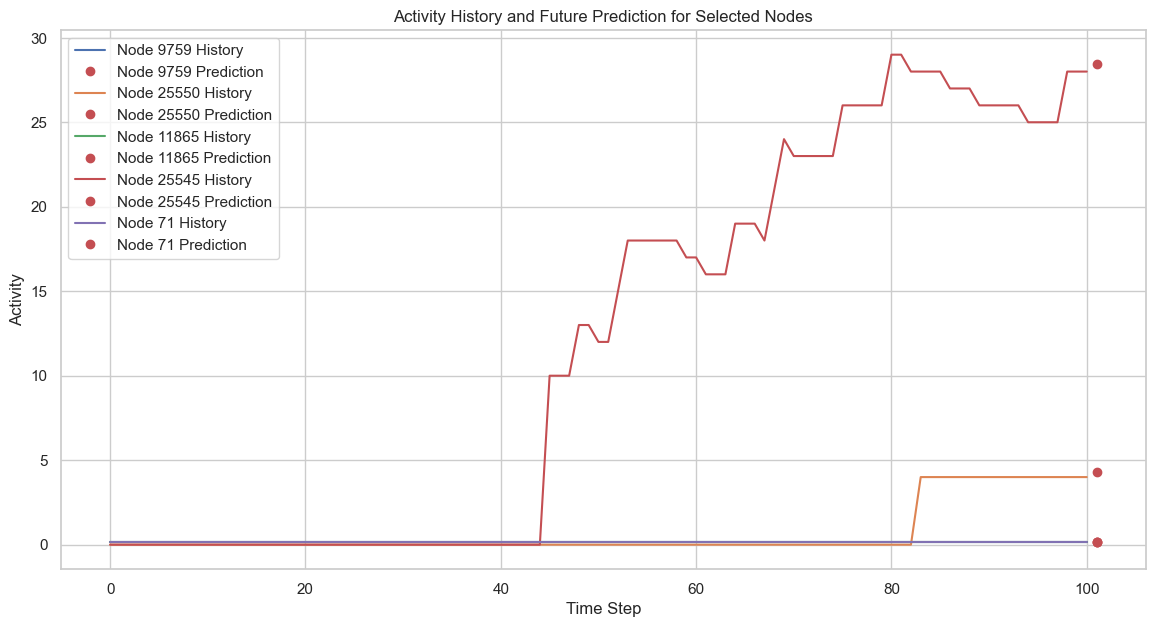

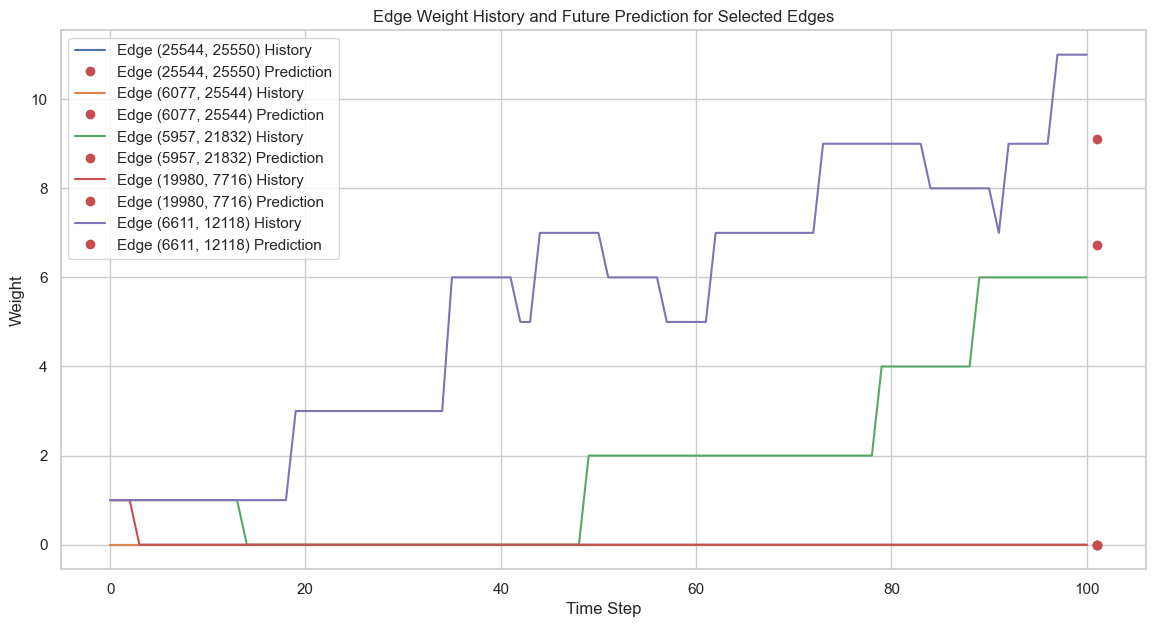

In [32]:
from sklearn.linear_model import LinearRegression
def prepare_data(history, keys):
    X = []
    y = []
    for t in range(len(history) - 1):
        X.append([history[t].get(key, 0) for key in keys])
        y.append([history[t + 1].get(key, 0) for key in keys])
    return np.array(X), np.array(y)

nodes = list(sampel.nodes())
X_activity, y_activity = prepare_data(history_author_activity, nodes)

model_activity = LinearRegression()
model_activity.fit(X_activity, y_activity)

future_X_activity = np.array([history_author_activity[-1].get(node, 0) for node in nodes]).reshape(1, -1)
future_y_activity_pred = model_activity.predict(future_X_activity)

edges = list(sampel.edges())
X_weight, y_weight = prepare_data(history_edge_weights, edges)

model_weight = LinearRegression()
model_weight.fit(X_weight, y_weight)

future_X_weight = np.array([history_edge_weights[-1].get(edge, 0) for edge in edges]).reshape(1, -1)
future_y_weight_pred = model_weight.predict(future_X_weight)

print("未来活动度预测：")
for node, pred_activity in zip(G.nodes(), future_y_activity_pred[0]):
    print(f"节点 {node}: {pred_activity}")

print("未来边权重预测：")
for edge, pred_weight in zip(G.edges(), future_y_weight_pred[0]):
    print(f"边 {edge}: {pred_weight}")

selected_nodes = random.sample(nodes, 5)  


plt.figure(figsize=(14, 7))
for node in selected_nodes:
    historical_activities = [history_author_activity[t].get(node, 0) for t in range(len(history_author_activity))]
    plt.plot(range(len(historical_activities)), historical_activities, label=f'Node {node} History')
    plt.plot(len(historical_activities), future_y_activity_pred[0][nodes.index(node)], 'ro', label=f'Node {node} Prediction')

plt.xlabel('Time Step')
plt.ylabel('Activity')
plt.title('Activity History and Future Prediction for Selected Nodes')
plt.legend()
plt.show()

selected_edges = random.sample(edges, 5)  

plt.figure(figsize=(14, 7))
for edge in selected_edges:
    historical_weights = [history_edge_weights[t].get(edge, 0) for t in range(len(history_edge_weights))]
    plt.plot(range(len(historical_weights)), historical_weights, label=f'Edge {edge} History')
    plt.plot(len(historical_weights), future_y_weight_pred[0][edges.index(edge)], 'ro', label=f'Edge {edge} Prediction')

plt.xlabel('Time Step')
plt.ylabel('Weight')
plt.title('Edge Weight History and Future Prediction for Selected Edges')
plt.legend()
plt.show()